In [5]:
%load_ext autoreload
%autoreload 2

%matplotlib inline

import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

In [2]:
cutoff = pd.read_csv('./archive/d10e200w1000/wav_cutoff.csv')
loss = pd.read_csv('./archive/d10e200w1000/wav_loss.csv')
pred = pd.read_csv('./archive/d10e200w1000/wav_pred.csv')

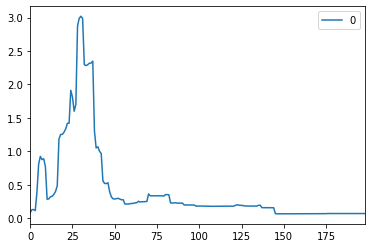

In [8]:
loss.plot()

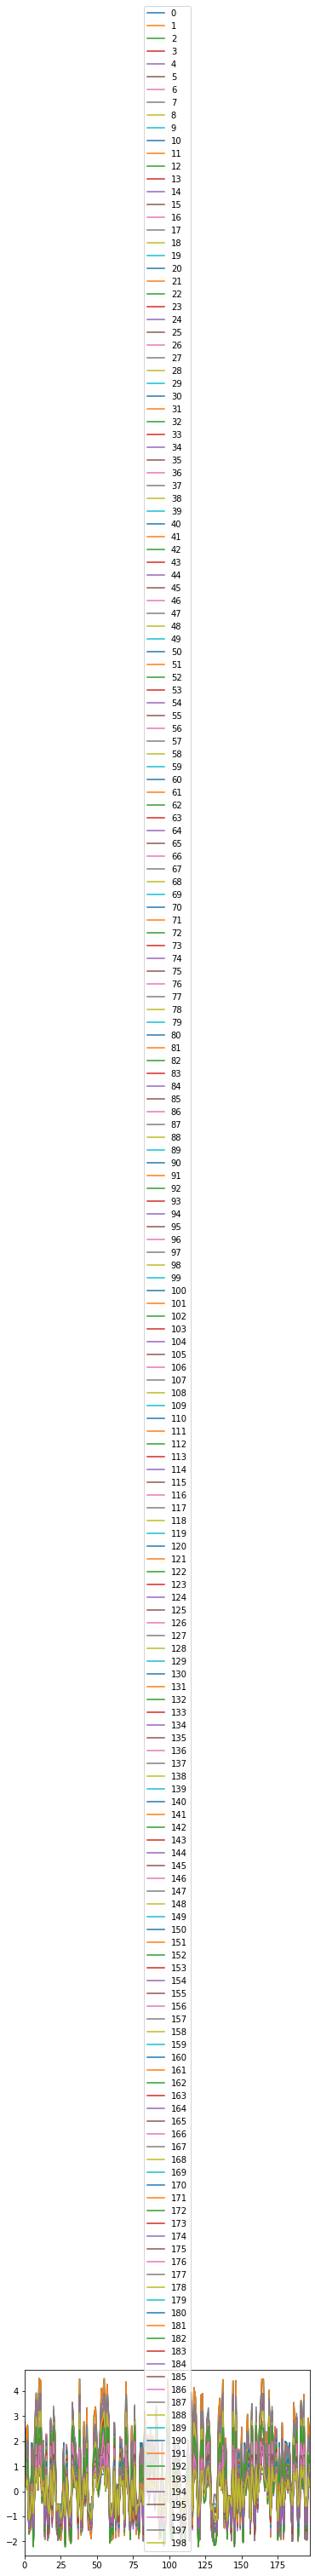

In [36]:
pred.T.plot()

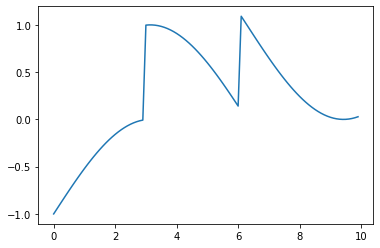

In [12]:
import numpy as np
import matplotlib.pyplot as plt

start = 0
end = 10
interval = end-start

freq = 0.1

x = np.arange(start,end,freq)

y = np.sin(0.5*x)

steps = np.ones(len(x))
y[x<(start+int(interval/3))] = y[x<(start+int(interval/3))]-1
y[x>(start+int(2*interval/3))] = y[x>(start+int(2*interval/3))]+1


plt.plot(x,y)


In [50]:
from func_gen import *
import sklearn
import torch
from params import parameters
import model_conf
import dataset_loader
import trainer
import pandas as pd

conf = parameters()

x,y = step_gen(range = (0,30),step=0.3)
tdl,vdl = dl_maker(x,y,conf)
data = dataset_loader.DataBunch(tdl,vdl,c=1,features4tree=1)

loss_func =  torch.nn.MSELoss()

learn = model_conf.Learner(*model_conf.get_model(conf,data), loss_func, data)

device = torch.device('cuda',0)
torch.cuda.set_device(device)

run = trainer.Runner(cb_funcs=conf.cbfs,conf=conf)
run.fit(conf.epochs, learn)

run.wavelets.prune(even_cutoff=False)

xx = learn.data.valid_dl.ds.x.numpy()
yy = learn.data.valid_dl.ds.y.numpy()
zz = run.recorder.tot_pred.cpu().numpy()
real_pred = pd.DataFrame([xx,yy,zz]) 

pred_list = [i.tolist() for i in run.wavelets.wavelet_pred_list]
pred_df = pd.DataFrame(pred_list)
loss_df = pd.DataFrame(run.wavelets.wavelet_loss)
cutoff_df = pd.DataFrame(run.wavelets.psi.cutoff_value_list)

pred_df.to_csv('wav_pred.csv',index=False)
loss_df.to_csv('wav_loss.csv',index=False)
cutoff_df.to_csv('wav_cutoff.csv',index=False)

train: [0.527068408567514, tensor(0.5271, device='cuda:0')]
valid: [0.4330473235159209, tensor(0.4330, device='cuda:0')]
train: [0.5259094807639051, tensor(0.5259, device='cuda:0')]
valid: [0.4328218228889234, tensor(0.4328, device='cuda:0')]
train: [0.5288995771265742, tensor(0.5289, device='cuda:0')]
valid: [0.4315651402328954, tensor(0.4316, device='cuda:0')]
train: [0.5286803743732509, tensor(0.5287, device='cuda:0')]
valid: [0.4308344812104196, tensor(0.4308, device='cuda:0')]
train: [0.528219991655492, tensor(0.5282, device='cuda:0')]
valid: [0.4296751889315518, tensor(0.4297, device='cuda:0')]
train: [0.5275253751384679, tensor(0.5275, device='cuda:0')]
valid: [0.42884471199729224, tensor(0.4288, device='cuda:0')]
train: [0.5265186366750233, tensor(0.5265, device='cuda:0')]
valid: [0.42921303257797705, tensor(0.4292, device='cuda:0')]
train: [0.5251938549440298, tensor(0.5252, device='cuda:0')]
valid: [0.4311510432850231, tensor(0.4312, device='cuda:0')]
train: [0.52365915099186


 cuttoff value is: 64
loss is 0.43903765082359314
acc is 0.43903765082359314

 cuttoff value is: 64
loss is 0.43903765082359314
acc is 0.43903765082359314

 cuttoff value is: 64
loss is 0.43903765082359314
acc is 0.43903765082359314

 cuttoff value is: 64
loss is 0.43903765082359314
acc is 0.43903765082359314

 cuttoff value is: 64
loss is 0.43903765082359314
acc is 0.43903765082359314

 cuttoff value is: 64
loss is 0.43903765082359314
acc is 0.43903765082359314

 cuttoff value is: 64
loss is 0.43903765082359314
acc is 0.43903765082359314

 cuttoff value is: 64
loss is 0.43903765082359314
acc is 0.43903765082359314

 cuttoff value is: 64
loss is 0.43903765082359314
acc is 0.43903765082359314

 cuttoff value is: 64
loss is 0.43903765082359314
acc is 0.43903765082359314

 cuttoff value is: 64
loss is 0.43903765082359314
acc is 0.43903765082359314

 cuttoff value is: 64
loss is 0.43903765082359314
acc is 0.43903765082359314

 cuttoff value is: 64
loss is 0.43903765082359314
acc is 0.4390

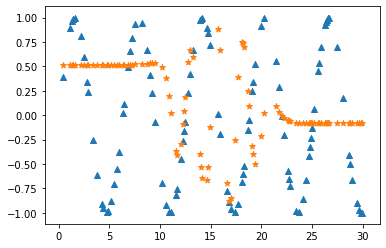

In [71]:
xx = learn.data.valid_dl.ds.x.numpy()
yy = learn.data.valid_dl.ds.y.numpy()
zz = run.recorder.tot_pred.cpu().numpy()
real_pred = pd.DataFrame([xx,yy,zz]) 


plt.scatter(xx, yy, marker='^')
plt.scatter(xx, zz, marker='*')

In [72]:
from func_gen import *
import sklearn
import torch
from params import parameters
import model_conf
import dataset_loader
import trainer

conf = parameters()
conf.tree_depth = 10
conf.use_prenet = True
conf.epochs = 150
conf.learning_rate = 0.1
conf.n_trees = 1

x,y = step_gen(range = (0,30),step=0.1)
tdl,vdl = dl_maker(x,y,conf)
data = dataset_loader.DataBunch(tdl,vdl,c=1,features4tree=1)

loss_func =  torch.nn.MSELoss()

learn = model_conf.Learner(*model_conf.get_model(conf,data), loss_func, data)

device = torch.device('cuda',0)
torch.cuda.set_device(device)

run = trainer.Runner(cb_funcs=conf.cbfs,conf=conf)
run.fit(conf.epochs, learn)

run.wavelets.prune(even_cutoff=False)
# run.recorder.plot_lr()

train: [0.49901428981799983, tensor(0.4990, device='cuda:0')]
valid: [0.5045857285008286, tensor(0.5046, device='cuda:0')]
train: [0.5011751165437461, tensor(0.5012, device='cuda:0')]
valid: [0.49590239861998897, tensor(0.4959, device='cuda:0')]
train: [0.4998235749961132, tensor(0.4998, device='cuda:0')]
valid: [0.49922079991812657, tensor(0.4992, device='cuda:0')]
train: [0.500879126401683, tensor(0.5009, device='cuda:0')]
valid: [0.4980818237921204, tensor(0.4981, device='cuda:0')]
train: [0.5002354863864272, tensor(0.5002, device='cuda:0')]
valid: [0.49365650523792615, tensor(0.4937, device='cuda:0')]
train: [0.49899383089435634, tensor(0.4990, device='cuda:0')]
valid: [0.4916129064078283, tensor(0.4916, device='cuda:0')]
train: [0.47648009494762517, tensor(0.4765, device='cuda:0')]
valid: [0.7068771208175505, tensor(0.7069, device='cuda:0')]
train: [0.4820156951448811, tensor(0.4820, device='cuda:0')]
valid: [0.48378341366546324, tensor(0.4838, device='cuda:0')]
train: [0.47689056

train: [0.28288677082726016, tensor(0.2829, device='cuda:0')]
valid: [0.5026998423566722, tensor(0.5027, device='cuda:0')]
train: [0.2822084189647466, tensor(0.2822, device='cuda:0')]
valid: [0.481632695053563, tensor(0.4816, device='cuda:0')]
train: [0.28156692353054064, tensor(0.2816, device='cuda:0')]
valid: [0.4638210258098564, tensor(0.4638, device='cuda:0')]
train: [0.28095888735643076, tensor(0.2810, device='cuda:0')]
valid: [0.4451455780954072, tensor(0.4451, device='cuda:0')]
train: [0.2803792621365827, tensor(0.2804, device='cuda:0')]
valid: [0.42876750290995896, tensor(0.4288, device='cuda:0')]
train: [0.2798190140605566, tensor(0.2798, device='cuda:0')]
valid: [0.41087765163845485, tensor(0.4109, device='cuda:0')]
train: [0.2792726393362776, tensor(0.2793, device='cuda:0')]
valid: [0.39220709752554844, tensor(0.3922, device='cuda:0')]
train: [0.27874163727262125, tensor(0.2787, device='cuda:0')]
valid: [0.3740615459403606, tensor(0.3741, device='cuda:0')]
train: [0.27822887

train: [0.09297674568138313, tensor(0.0930, device='cuda:0')]
valid: [0.6567089967053346, tensor(0.6567, device='cuda:0')]
train: [0.091036193999485, tensor(0.0910, device='cuda:0')]
valid: [0.650621356386127, tensor(0.6506, device='cuda:0')]
train: [0.0879418956699656, tensor(0.0879, device='cuda:0')]
valid: [0.6555265946821733, tensor(0.6555, device='cuda:0')]
train: [0.08452564448266481, tensor(0.0845, device='cuda:0')]
valid: [0.6697793055062342, tensor(0.6698, device='cuda:0')]
train: [0.0820622610215524, tensor(0.0821, device='cuda:0')]
valid: [0.6816679829298847, tensor(0.6817, device='cuda:0')]
train: [0.07958377060012438, tensor(0.0796, device='cuda:0')]
valid: [0.6954862035886206, tensor(0.6955, device='cuda:0')]
train: [0.07660315404483928, tensor(0.0766, device='cuda:0')]
valid: [0.7052134504221906, tensor(0.7052, device='cuda:0')]
train: [0.07405219386466107, tensor(0.0741, device='cuda:0')]
valid: [0.7151714286418877, tensor(0.7152, device='cuda:0')]
train: [0.07190311488


 cuttoff value is: 420
loss is 0.7432690262794495
acc is 0.7432690262794495

 cuttoff value is: 425
loss is 0.7304232120513916
acc is 0.7304232716560364

 cuttoff value is: 430
loss is 0.7344846725463867
acc is 0.7344847321510315

 cuttoff value is: 435
loss is 0.7472223043441772
acc is 0.7472223043441772

 cuttoff value is: 440
loss is 0.7460504174232483
acc is 0.7460504174232483

 cuttoff value is: 445
loss is 0.739723801612854
acc is 0.739723801612854

 cuttoff value is: 450
loss is 0.7708653211593628
acc is 0.7708653807640076

 cuttoff value is: 455
loss is 0.7758123874664307
acc is 0.7758123874664307

 cuttoff value is: 460
loss is 0.7761841416358948
acc is 0.7761841416358948

 cuttoff value is: 465
loss is 0.790316104888916
acc is 0.7903161644935608

 cuttoff value is: 470
loss is 0.7877886295318604
acc is 0.7877886295318604

 cuttoff value is: 475
loss is 0.7830071449279785
acc is 0.7830072045326233

 cuttoff value is: 480
loss is 0.7968298196792603
acc is 0.7968298196792603

 


 cuttoff value is: 955
loss is 0.8448975682258606
acc is 0.8448975086212158

 cuttoff value is: 960
loss is 0.8468693494796753
acc is 0.8468692898750305

 cuttoff value is: 965
loss is 0.8493469953536987
acc is 0.8493468761444092

 cuttoff value is: 970
loss is 0.8252584934234619
acc is 0.8252585530281067

 cuttoff value is: 975
loss is 0.8254388570785522
acc is 0.8254388570785522

 cuttoff value is: 980
loss is 0.8249162435531616
acc is 0.8249161839485168

 cuttoff value is: 985
loss is 0.8265066146850586
acc is 0.8265065550804138

 cuttoff value is: 990
loss is 0.8270678520202637
acc is 0.8270678520202637

 cuttoff value is: 995
loss is 0.8368245363235474
acc is 0.8368245363235474


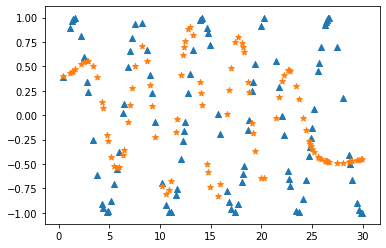

In [73]:
xx = learn.data.valid_dl.ds.x.numpy()
yy = learn.data.valid_dl.ds.y.numpy()
zz = run.recorder.tot_pred.cpu().numpy()
real_pred = pd.DataFrame([xx,yy,zz]) 


plt.scatter(xx, yy, marker='^')
plt.scatter(xx, zz, marker='*')

In [74]:
pred_list = [i.tolist() for i in run.wavelets.wavelet_pred_list]
pred_df = pd.DataFrame(pred_list)
loss_df = pd.DataFrame(run.wavelets.wavelet_loss)
cutoff_df = pd.DataFrame(run.wavelets.psi.cutoff_value_list)

pred_df.to_csv('wav_pred.csv',index=False)
loss_df.to_csv('wav_loss.csv',index=False)
cutoff_df.to_csv('wav_cutoff.csv',index=False)

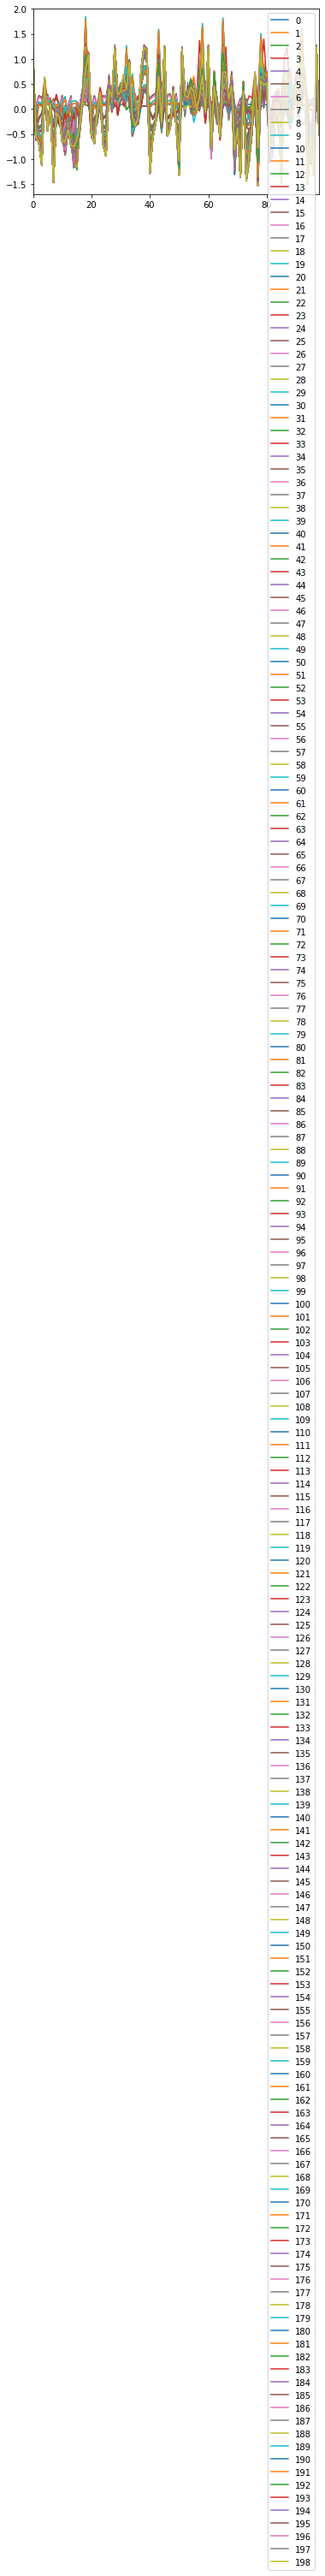

In [77]:
pred_df.T.plot()

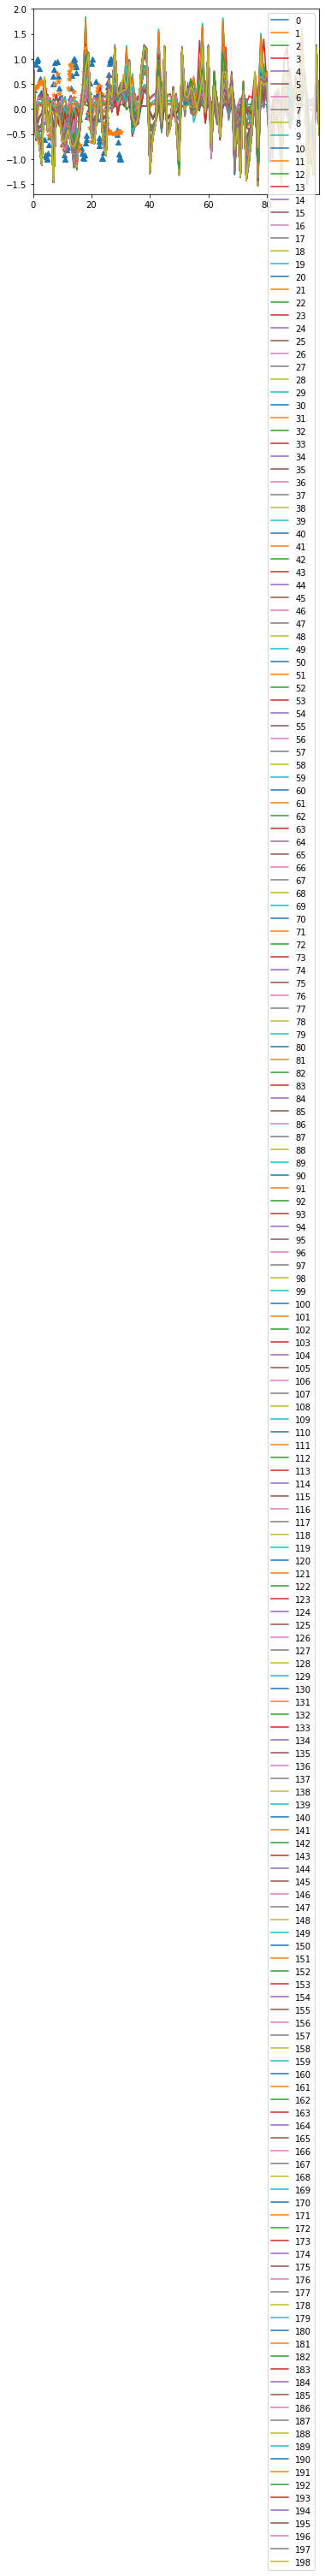

In [78]:
import matplotlib.pyplot as plt

# fig, axes = plt.subplots(nrows=1, ncols=2)
fig, ax = plt.subplots()
pred_df.T.plot(ax=ax)
plt.scatter(xx, yy, marker='^',axes=ax)
plt.scatter(xx, zz, marker='*',axes=ax)
# ntl.T[0].plot(ax=ax)#ax=axes[0])
# ax.legend(["softmax loss", "tree loss"]);
# ax.set_xlabel("Iterations")
# ax.set_ylabel("Loss")